## Reading Excel files

In this lecture we'll learn how to read Excel files (.xlsx) and its sheets into a pandas `DataFrame`s, and how to export that `DataFrame`s to different sheets and Excel files using the pandas `ExcelWriter` and `to_excel` methods.

In [155]:
import pandas as pd

### **The `read_excel` method**

We'll begin with the `read_excel` method, that let us read Excel files into a `DataFrame`.

This method supports both XLS and XLSX file extensions from a local filesystem or URL and has a broad set of parameters to configure how the data will be read and parsed. These parameters are very similar to the parameters we saw on previous lectures where we introduced the `read_csv` method. The most common parameters are as follows:

* `filepath`: Path of the file to be read.
* `sheet_name`: Strings are used for sheet names. Integers are used in zero-indexed sheet positions. Lists of strings/integers are used to request multiple sheets. Specify None to get all sheets.
* `header`: Index of the row containing the names of the columns (None if none).
* `index_col`: Index of the column or sequence of indexes that should be used as index of rows of the data.
* `names`: Sequence containing the names of the columns (used together with header = None).
* `skiprows`: Number of rows or sequence of row indexes to ignore in the load.
* `na_values`: Sequence of values that, if found in the file, should be treated as NaN.
* `dtype`: Dictionary in which the keys will be column names and the values will be types of NumPy to which their content must be converted.
* `parse_dates`: Flag that indicates if Python should try to parse data with a format similar to dates as dates. You can enter a list of column names that must be joined for the parsing as a date.
* `date_parser`: Function to use to try to parse dates.
* `nrows`: Number of rows to read from the beginning of the file.
* `skip_footer`: Number of rows to ignore at the end of the file.
* `squeeze`: Flag that indicates that if the data read only contains one column the result is a Series instead of a DataFrame.
* `thousands`: Character to use to detect the thousands separator.

Full `read_excel` documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html.

In this case we'll try to read our `products.xlsx` Excel file.

This file contains records of products with its price, brand, description and merchant information on different sheets.

---

### **Reading our first Excel file**

Everytime we call `read_excel` method, we'll need to pass an explicit `filepath` parameter indicating the path where our Excel file is.

Any valid string path is acceptable. The string could be a URL. Valid URL schemes include HTTP, FTP, S3, and file. For file URLs, a host is expected. A local file could be: `file://localhost/path/to/table.xlsx`.

In [156]:
excel_df = pd.read_excel('files/products.xlsx')

In [157]:
excel_df.head() # first 5 rows 

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


---

### **First row behaviour with `header` parameter**

The Excel file we're reading has the following columns:

* `product_id`
* `price`
* `merchant_id`
* `brand`
* `name`

The first row (0-index) of the data has that column names, so we keep the implicit `header=0` parameter to let Pandas assign this first row as headers. We can overwrite this behavior defining explicitly the `header` parameter.

In [158]:
pd.read_excel('files/products.xlsx', header=None) # no header

,0,1,2,3,4
0,product_id,price,merchant_id,brand,name
1,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
2,AVpgMuGwLJeJML43KY_c,69,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
3,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
4,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
...,...,...,...,...,...
1241,AVphFybdLJeJML43Wnza,64.95,1110,JBL,"JBL - 6 x 9"" 3-Way Car Speakers with Polypropy..."
1242,AVpe_qIa1cnluZ0-bjrN,871.06,1002,HP,HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...
1243,AVphibxI1cnluZ0-DpxG,74.95,1238,Magellan,Magellan Roadmate 5322-LM 5 Touchscreen Portab...
1244,AVpgrtW3ilAPnD_xv67M,294.35,1239,Pyle Pro,PMX840BT Bluetooth 8-Channel 800-Watt Powered ...


---

### **Adding index to our data using `index_col` parameter**

By default, pandas will automatically assign a numeric autoincremental index or row label starting with zero.

You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index.

In case there is a column that you feel would serve as a better index, you can override the default behavior by setting `index_col` property to a column. It takes a numeric value or a string for setting a single column as index or a list of numeric values for creating a multi-index.

In our data, we are choosing the first column, `product_id`, as index (index=0) by passing zero to the `index_col` argument.

In [159]:
excel_df = pd.read_excel('files/products.xlsx', index_col=1) 

In [160]:
excel_df.head()

,product_id,merchant_id,brand,name
price,,,,
104.99,AVphzgbJLJeJML43fA0o,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
69.00,AVpgMuGwLJeJML43KY_c,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
23.99,AVpe9FXeLJeJML43zHrq,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
290.99,AVpfVJXu1cnluZ0-iwTT,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
244.01,AVphUeKeilAPnD_x3-Be,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


---

### **Selecting specific sheets**

Excel files quite often have multiple sheets and the ability to read a specific sheet or all of them is very important. To make this easy, the pandas `read_excel` method takes an argument called `sheet_name` that tells pandas which sheet to read in the data from.

For this, you can either use the sheet name or the sheet number. Sheet numbers start with zero. The first sheet will be the one loaded by default. You can change sheet by specifying `sheet_name` parameter.

In [161]:
products_sheet_df = pd.read_excel('files/products.xlsx', sheet_name='Products', index_col="merchant_id")

In [162]:
products_sheet_df.head()    

,product_id,price,brand,name
merchant_id,,,,
1001,AVphzgbJLJeJML43fA0o,104.99,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1002,AVpgMuGwLJeJML43KY_c,69.00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
1001,AVpe9FXeLJeJML43zHrq,23.99,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
1001,AVpfVJXu1cnluZ0-iwTT,290.99,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
1004,AVphUeKeilAPnD_x3-Be,244.01,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [163]:
merchants_sheet = pd.read_excel('files/products.xlsx', sheet_name='Merchants', index_col="merchant_id")

In [164]:
merchants_sheet.tail() # last 5 rows

,merchant
merchant_id,
1236,PRIMESELLER
1237,Spy Tec
1238,Action Gear
1239,Overstock.com
1240,unknown


Try open the file `products.xlsx` in Excel and check the names of the sheets. There are two sheets: `Products` and `Merchants`.

---

### **The `ExcelFile` class**

Another approach on reading Excel data is using the `ExcelFile` class for parsing tabular Excel sheets into `DataFrame` objects.

This `ExcelFile` class will let us work with sheets easily, and will be faster than the previous `read_excel` method.

In [165]:
excel_file = pd.ExcelFile('files/products.xlsx')

We can now explore the sheets on that Excel file with `sheet_names`:

In [166]:
excel_file.sheet_names # all sheet names of the Excel file

['Products', 'Descriptions', 'Merchants']

And parse specified sheet(s) into a Pandas `DataFrame` using ExcelFile's `parse()` method.

Everytime we call `parse()` method, we'll need to pass an explicit `sheet_name` parameter indicating which sheet from the Excel file we want to be parsed. The first sheet will be parsed by default.

In [167]:
products_parse = excel_file.parse('Products', index_col="product_id", header=0) # parse the Products sheet

In [168]:
products_parse.head() # first 5 rows

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [169]:
products_parse.dtypes

price          float64
merchant_id      int64
brand           object
name            object
dtype: object

In [170]:
merchants_parse = excel_file.parse('Merchants', index_col="merchant_id", header=0) # parse the Merchants sheet 

In [171]:
merchants_parse.head(3) # first 3 rows

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com


In [172]:
merchants_parse.dtypes

merchant    object
dtype: object

---

### **Save to Excel file**

Finally we can save our `DataFrame` as a Excel file.

First let´s try saving a hardcoded `DataFrame` to a new Excel file. We can use the `to_excel()` method to do this.

In [173]:
columns_names = ['book_id', 'title', 'author', 'price', 'quantity']

books_df = pd.DataFrame(columns=columns_names, 
                         data=[
                            [1, 'The Great Gatsby', 'F. Scott Fitzgerald', 10.99, 3],
                            [2, 'To Kill a Mockingbird', 'Harper Lee', 7.99, 5],
                            [3, '1984', 'George Orwell', 8.99, 2],
                            [4, 'Pride and Prejudice', 'Jane Austen', 6.99, 4],
                            [5, 'The Catcher in the Rye', 'J.D. Salinger', 9.99, 1]
                        ]
                        ).set_index('book_id')

In [174]:
books_df

,title,author,price,quantity
book_id,,,,
1,The Great Gatsby,F. Scott Fitzgerald,10.99,3
2,To Kill a Mockingbird,Harper Lee,7.99,5
3,1984,George Orwell,8.99,2
4,Pride and Prejudice,Jane Austen,6.99,4
5,The Catcher in the Rye,J.D. Salinger,9.99,1


In [175]:
books_df.to_excel('files/books.xlsx', sheet_name="books") # save to Excel file

In [176]:
pd.read_excel('files/books.xlsx').head() # read the file to check

,book_id,title,author,price,quantity
0,1,The Great Gatsby,F. Scott Fitzgerald,10.99,3
1,2,To Kill a Mockingbird,Harper Lee,7.99,5
2,3,1984,George Orwell,8.99,2
3,4,Pride and Prejudice,Jane Austen,6.99,4
4,5,The Catcher in the Rye,J.D. Salinger,9.99,1


Let´s save the `products_parse` `DataFrame` to a new Excel file called `products_parsed.xlsx`.

In [177]:
products_parsed_df = products_parse.to_excel('files/products_parsed.xlsx', index=False)

In [178]:
pd.read_excel('files/products_parsed.xlsx').set_index('merchant_id').head() # read the file to check

,price,brand,name
merchant_id,,,
1001,104.99,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1002,69.00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
1001,23.99,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
1001,290.99,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
1004,244.01,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


---

### **Positioning Data with `startrow` and `startcol`**

Suppose we wanted to insert the our data into the spreadsheet file in a position somewhere other than the top-left corner.

We can shift where the `to_excel` method writes the data by using `startrow` to set the cell after which the first row will be printed, and `startcol` to set which cell after which the first column will be printed.

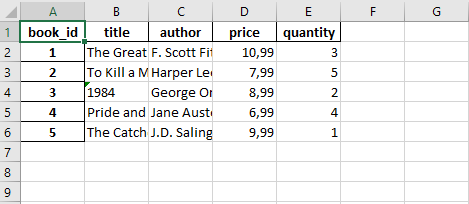

In [179]:
books_df.to_excel('files/books.xlsx', sheet_name="books", startrow=2, startcol=4) 

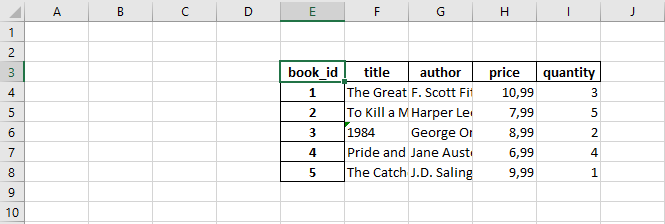

The `startrow` and `startcol` parameters are both zero-indexed, so the first row and column are 0.

---

### **Saving multiple sheets**

If we wanted to write a single `DataFrame` to a single sheet with default formatting then we are done. However, if we want to write multiple sheets and/or multiple `DataFrames`, then we will need to create an `ExcelWriter` object.

The `ExcelWriter` object is included in the Pandas module and is used to open Excel files and handle write operations. This object behaves almost exactly like the vanilla Python open object that we used on previous courses and can be used within a `with` block.

In [180]:
writer = pd.ExcelWriter('files/books.xlsx')

In [181]:
writer

Instead of including the file pathname in the `to_excel` call, we will use the `ExcelWriter` object writer instead.

In [182]:
with writer:
    books_df.to_excel(writer, sheet_name='books')

In [183]:
pd.read_excel('files/books.xlsx', sheet_name='books').head()

,book_id,title,author,price,quantity
0,1,The Great Gatsby,F. Scott Fitzgerald,10.99,3
1,2,To Kill a Mockingbird,Harper Lee,7.99,5
2,3,1984,George Orwell,8.99,2
3,4,Pride and Prejudice,Jane Austen,6.99,4
4,5,The Catcher in the Rye,J.D. Salinger,9.99,1


We can now add another `Merchants` sheet simply using the `writer` object:

In [186]:
writer = pd.ExcelWriter('files/products.xlsx')

In [187]:
writer

In [188]:
with writer:
    merchants_sheet.to_excel(writer, sheet_name='Merchants')

In [191]:
pd.read_excel('files/products.xlsx', sheet_name='Merchants').head()

,merchant_id,merchant
0,1001,Bestbuy.com
1,1002,Walmart.com
2,1003,Bestbuy.com
3,1004,Growkart
4,1005,bhphotovideo.com
